In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
raw_data = pd.read_csv('housing_data.csv')

In [7]:
raw_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
raw_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


h:\Users\Oscar Pang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

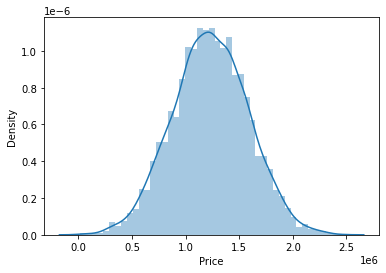

In [10]:
sns.distplot(raw_data['Price'])

In [11]:
x = raw_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]

y = raw_data['Price']

In [12]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print(model.intercept_)

-2633481.9782401924


In [14]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff']) # a 1 unit increase in ___ is associated with an increase of ___ in prices 

,Coeff
Avg. Area Income,21.553727
Avg. Area House Age,164386.479092
Avg. Area Number of Rooms,122826.975938
Avg. Area Number of Bedrooms,-204.325187
Area Population,15.125416


(array([  5.,  45., 151., 320., 482., 512., 326., 123.,  33.,   3.]),
 array([-340572.8103802 , -271654.11809014, -202735.42580008,
        -133816.73351001,  -64898.04121995,    4020.65107011,
          72939.34336018,  141858.03565024,  210776.7279403 ,
         279695.42023037,  348614.11252043]),
 <BarContainer object of 10 artists>)

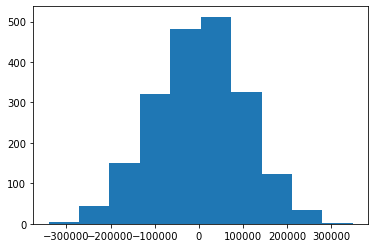

In [17]:
# Make predictions for the test dataset
predictions = model.predict(x_test)

# Plot the error
plt.hist(y_test - predictions)

In [19]:
from sklearn import metrics

# Calculate the mean squared error
mse = metrics.mean_absolute_error(y_test, predictions) 
print(mse)

81858.3467401306


In [21]:
from sklearn.metrics import r2_score

# Calculate the r^2 value
r2 = r2_score(y_test, predictions)
print(r2)

0.9160563527210516


In [31]:
# Predict the price of a specific house

test = []

with open('test.csv') as file:
    output = [float(s) for line in file.readlines() for s in line[:-1].split(',')]
    test.append(output)

prediction = model.predict(test)[0]

print(f"Predicted House Price: ${prediction:.2f}")

Predicted House Price: $1224483.85


h:\Users\Oscar Pang\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
